# Обработка данных

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

sns.set(style="darkgrid")

In [82]:
data = pd.read_csv("data.csv", encoding='latin1')

### **Описание данных:**

**loan_amnt** - запрашиваемая у банка сумма для кредита \

**funded_amnt** - накопительная сумма \

**funded_amnt_inv** - накопительная сумма для инвестора \

**term** - на какой промежуток выдан кредит

**int_rate** - процентная ставка \

**installment** - первоначальный взнос \

**grade** - оценка кредитного риска

**emp_title** - профессия

**emp_length** - опыт работы

**home_ownership** - тип жилья

**annual_inc** - годовые доходы \

**verification_status** - статус верификации

**issue_d** - месяц в который получено финансирование

**purpose** - цель

**addr_state** - кто выдает кредит (гос сторона)

**dti** - это процент ежемесячного валового дохода потребителя, который идет на выплату долгов \

**delinq_2yrs** - просрочка платежей более чем на 30 дней за последние два года \

**earliest_cr_line** - месяц открытия самой ранней кредитной истории

**inq_last_6mths** - количество обращений кредитора(то есть Банка) в бюро кредитных историй, если клиент ходит по разным банкам и просит кредиты, то это говорит, что этому клиенту либо отказывают, либо он решил набрать везде кредитов. Как правило это негативно влияет \

**open_acc** - это количество открытых кредитов

**revol_bal** - общий оборотный остаток

**revol_util** - доля утилизации. Клиенту выдали кредитную карту с лимитом 100 рублей, он уже потратил 40 рублей, revol_util будет равен 40/100 = 0.4

**total_acc** - видимо все кредиты и активные, и закрытые

**out_prncp** - оставшаяся непогашенная сумма

**total_pymnt** - полученные на сегодня платежи

**loan_status** - текущий статус кредита (закрыт не закрыт)

**risk** - выадем не выдаем

In [101]:
data['grade']

0         C
1         D
2         D
3         D
4         C
         ..
310699    D
310700    D
310701    C
310702    E
310703    C
Name: grade, Length: 310704, dtype: object

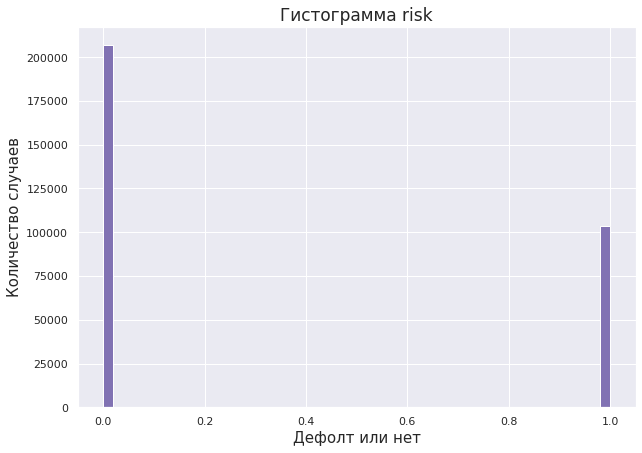

In [83]:
plt.ticklabel_format(style='plain')
data['risk'].hist(bins=50, facecolor='m', figsize=(10, 7))

plt.title('Гистограмма risk', size = 17)
plt.xlabel('Дефолт или нет', size = 15)
plt.ylabel('Количество случаев', size = 15)
plt.show()

Важно было убедиться, что у нас достаточное количество дефолтов для исследования и разница между признаками не превышает 70%.

Посмотрим на распределение loan_amnt

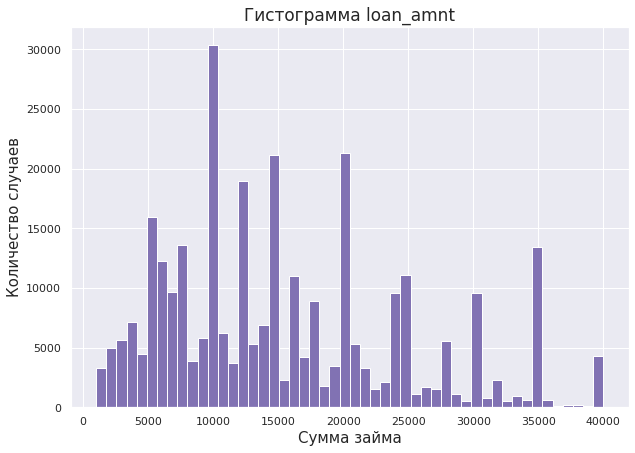

In [84]:
plt.ticklabel_format(style='plain')
data['loan_amnt'].hist(bins=50, facecolor='m', figsize=(10, 7))

plt.title('Гистограмма loan_amnt', size = 17)
plt.xlabel('Сумма займа', size = 15)
plt.ylabel('Количество случаев', size = 15)
plt.show()

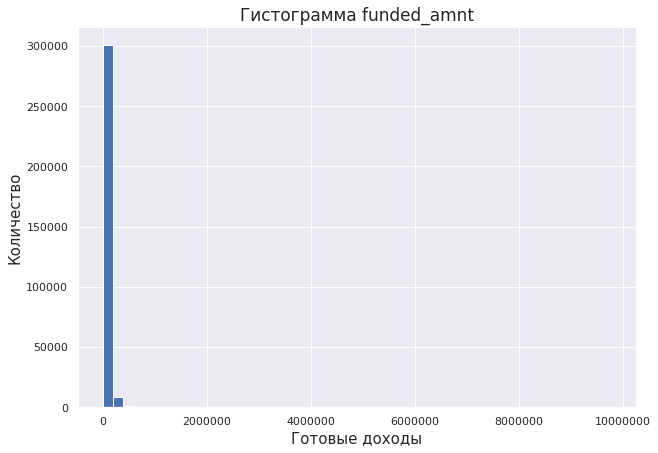

In [90]:
plt.ticklabel_format(style='plain')
data['annual_inc'].hist(bins=50, figsize=(10, 7))

plt.title('Гистограмма funded_amnt', size = 17)
plt.xlabel('Готовые доходы', size = 15)
plt.ylabel('Количество', size = 15)
plt.show()

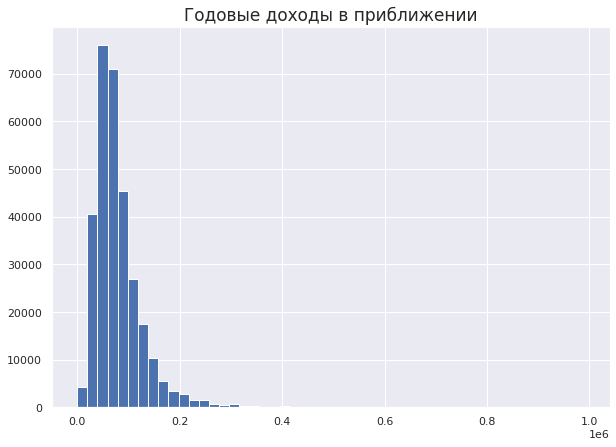

In [92]:
data[data['annual_inc'] < 1000000]['annual_inc'].hist(bins=50, figsize=(10, 7))

plt.title('Годовые доходы в приближении', size = 17)
plt.show()

Посмотрим на пропущенные данные:

In [ ]:
data.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title              29565
emp_length             22615
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
addr_state                 0
dti                      148
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             1
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               213
total_acc                  0
out_prncp                  0
total_pymnt                0
loan_status                0
risk                       0
dtype: int64

In [93]:
data.drop('pub_rec', axis=1, inplace=True) 
# не поняли что это

In [94]:
data['emp_title']

0                                             Chef
1                                      Postmaster 
2                                   Administrative
3                                    IT Supervisor
4                                         Mechanic
                            ...                   
310699                                     Analyst
310700                                     DENTIST
310701                                   Director 
310702    Certified Occupational Therapy Assistant
310703                          Principal Engineer
Name: emp_title, Length: 310704, dtype: object

In [98]:
plt.ticklabel_format(style='plain')
data['emp_title'].hist(bins=50, facecolor='m', figsize=(10, 7))

plt.title('Гистограмма emp_title', size = 17)
plt.xlabel('Профессия', size = 15)
plt.ylabel('Значение', size = 15)
plt.show()

KeyboardInterrupt: ignored

In [95]:
data['emp_length']

0         10+ years
1         10+ years
2           6 years
3         10+ years
4         10+ years
            ...    
310699      2 years
310700       1 year
310701    10+ years
310702     < 1 year
310703       1 year
Name: emp_length, Length: 310704, dtype: object

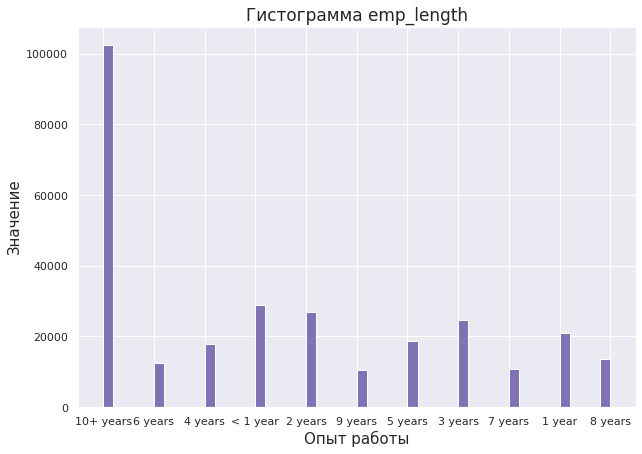

In [96]:
plt.ticklabel_format(style='plain')
data['emp_length'].hist(bins=50, facecolor='m', figsize=(10, 7))

plt.title('Гистограмма emp_length', size = 17)
plt.xlabel('Опыт работы', size = 15)
plt.ylabel('Значение', size = 15)
plt.show()

Так как меньше 10% признаков в emp_title и  emp_lenght пропущены, не будем выкидывать эти признаки, а просто заменим значения пустой строкой.

In [97]:
data.fillna(value={'emp_title': ''}, inplace = True)

Ниже с **emp_length** надо подумать, может лучше сделать просто количество лет и не делать это категориальным признаком

In [ ]:
data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [ ]:
data.fillna(value={'emp_length': 'No'}, inplace = True)

In [ ]:
# data.loc(data['emp_length'] == '10+ years', 'emp_length') = 11
# data.loc(data['emp_length'] == '< 1 year', 'emp_length') = 0

Два нижних признака пока вообще не поняла что значат, пока просто убрала NAN

In [ ]:
data['dti'].values

array([30.46, 50.53, 18.92, ..., 18.56, 20.62, 16.14])

In [ ]:
data['revol_util'].values

array([37. , 64.5, 29.9, ..., 85. , 71.2, 34.8])

In [ ]:
data.fillna(value={'dti': 0, 'revol_util': 0}, inplace = True)

In [ ]:
data.loc[data['term'] == ' 36 months', 'term'] = 36
data.loc[data['term'] == ' 60 months', 'term'] = 60

In [ ]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'loan_status', 'risk'],
      dtype='object')

In [ ]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,risk
0,1,2500,2500,2500.0,36,13.56,84.92,C,Chef,10+ years,...,Jan-12,0.0,11,15603,37.0,19,0.0,30026.442500,Fully Paid,0
1,2,30000,30000,30000.0,60,18.94,777.23,D,Postmaster,10+ years,...,Jun-09,0.0,18,34971,64.5,37,0.0,40856.678960,Fully Paid,0
2,3,5000,5000,5000.0,36,17.97,180.69,D,Administrative,6 years,...,Feb-99,0.0,9,25416,29.9,19,0.0,20215.792430,Fully Paid,0
3,4,4000,4000,4000.0,36,18.94,146.51,D,IT Supervisor,10+ years,...,Dec-03,0.0,12,4472,15.3,25,0.0,4549.217149,Fully Paid,0
4,5,30000,30000,30000.0,60,16.14,731.78,C,Mechanic,10+ years,...,Oct-97,0.0,21,36812,65.7,37,0.0,8735.148975,Fully Paid,0


Два признака с датами, которые возможно стоит перевести в data type, но не разобралась пока что они значат. 

In [ ]:
data['issue_d'].unique()

array(['Dec-18', 'Nov-18', 'Oct-18', 'Mar-16', 'Feb-16', 'Jan-16',
       'Nov-15', 'Dec-15', 'Oct-15'], dtype=object)

In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['earliest_cr_line'] = pd.to_datetime(data['issue_d'], format='%b-%y')

In [ ]:
data['earliest_cr_line'].unique()

array(['2018-12-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2015-10-01T00:00:00.000000000'], dtype='datetime64[ns]')

## Посмотрю немного на зависимости 

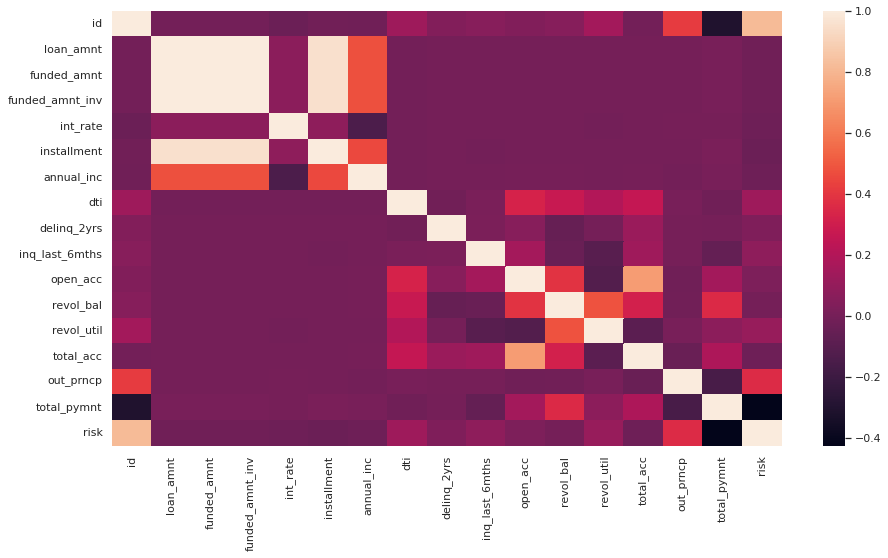

In [ ]:
corr_matrix = data.corr(method = 'spearman')

plt.figure(figsize = (15, 8))
sns.heatmap(corr_matrix.T)

plt.show()

Text(0, 0.5, 'earliest_cr_line')

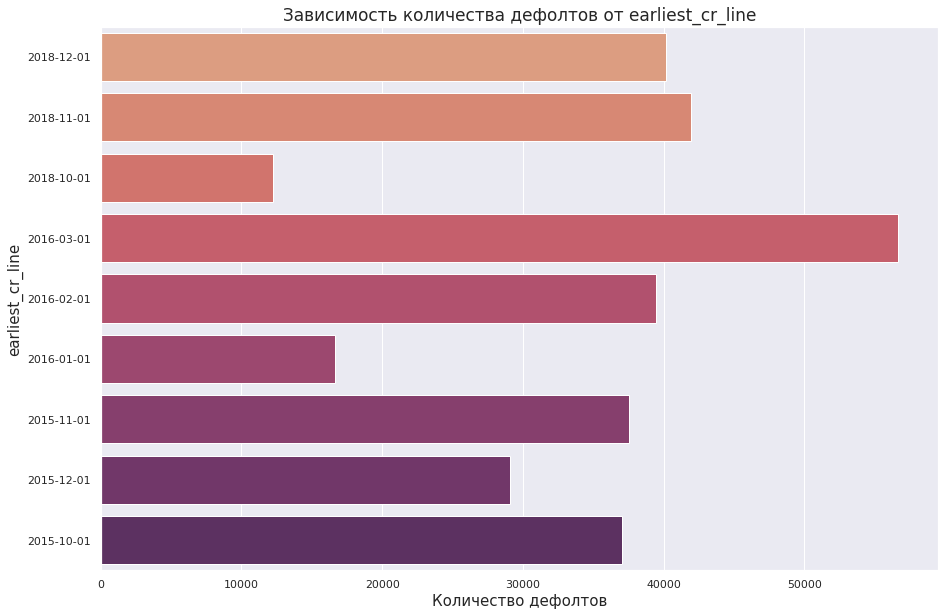

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data = data, y = data['earliest_cr_line'].dt.date, palette="flare")

plt.title('Зависимость количества дефолтов от earliest_cr_line', size = 17)
plt.xlabel('Количество дефолтов', size = 15)
plt.ylabel('earliest_cr_line', size = 15)

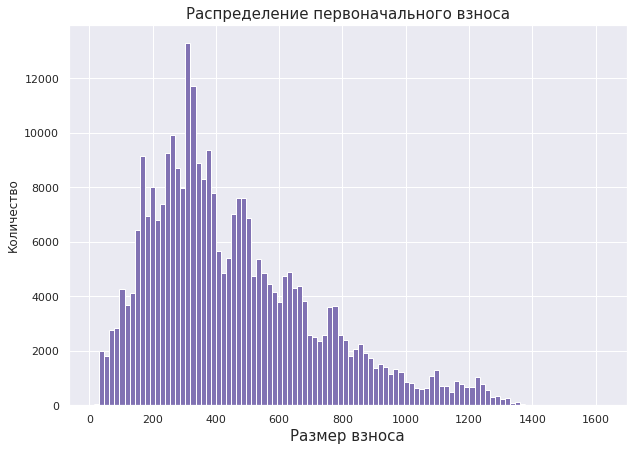

In [ ]:
data['installment'].hist(bins=100, facecolor='m', figsize=(10, 7))
plt.title('Распределение первоначального взноса', size = 15)
plt.xlabel('Размер взноса', size = 15)
plt.ylabel('Количество', size = 12)

plt.show()

Риск дефолта или очень поздного погашения в зависимости от опыта работы:

In [ ]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype=object)

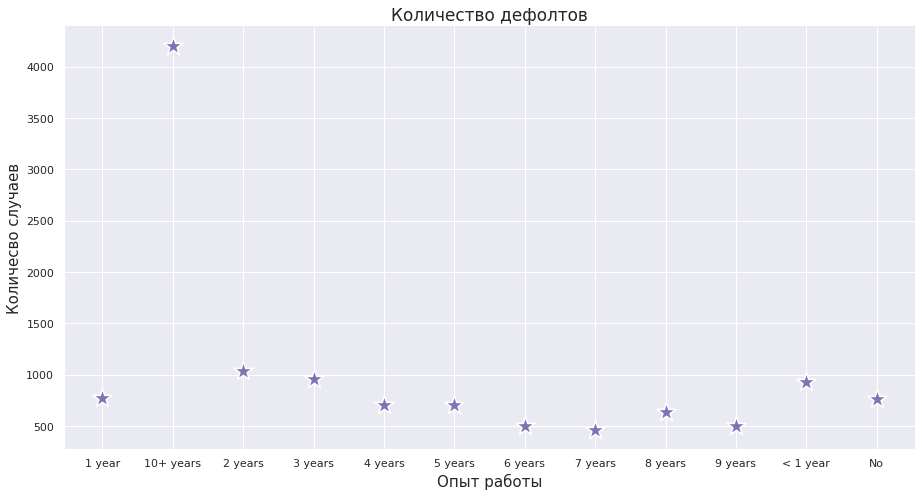

In [ ]:
answ = data.loc[(data['loan_status'] == 'Default') | (data['loan_status'] == 'Late (31-120 days)')]
ax = sns.relplot(data = answ.groupby('emp_length').count()['loan_status'], marker="*", color="m", s = 400)

plt.title('Количество дефолтов', size = 17)
plt.xlabel('Опыт работы', size = 15)
plt.ylabel('Количесво случаев', size = 15)
ax.fig.set_size_inches(15, 7)

## Ridge-регрессия с параметрами по умолчанию


Закодируем через OneHot все категориальные и отмасштабируем часть численных:

In [ ]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,risk
0,1,2500,2500,2500.0,36,13.56,84.92,C,Chef,10+ years,...,2018-12-01,0.0,11,15603,37.0,19,0.0,30026.442500,Fully Paid,0
1,2,30000,30000,30000.0,60,18.94,777.23,D,Postmaster,10+ years,...,2018-12-01,0.0,18,34971,64.5,37,0.0,40856.678960,Fully Paid,0
2,3,5000,5000,5000.0,36,17.97,180.69,D,Administrative,6 years,...,2018-12-01,0.0,9,25416,29.9,19,0.0,20215.792430,Fully Paid,0
3,4,4000,4000,4000.0,36,18.94,146.51,D,IT Supervisor,10+ years,...,2018-12-01,0.0,12,4472,15.3,25,0.0,4549.217149,Fully Paid,0
4,5,30000,30000,30000.0,60,16.14,731.78,C,Mechanic,10+ years,...,2018-12-01,0.0,21,36812,65.7,37,0.0,8735.148975,Fully Paid,0


In [ ]:
# categorical = ['emp_title', 'home_ownership', 'purpose', 'verification_status',  'addr_state', 'loan_status']
# numeric_features = ['loan_amnt', 'installment']

In [ ]:
categorical = ['emp_title', 'home_ownership', 'verification_status', 'emp_length']
numeric_features = ['loan_amnt', 'installment']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps = [
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [ ]:
x = data.drop(columns = ['risk'])
y = data['risk']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
model = pipeline.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_test, squared=False))

Train RMSE = 0.3992
Test RMSE = 0.4693


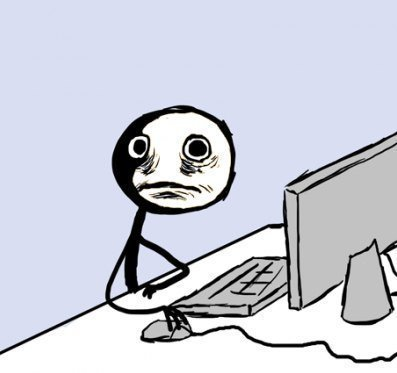